In [1]:
import pandas as pd
import numpy as np
import bluebelt as blue
import datetime
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings

In [2]:
df = pd.read_excel('data/data.xlsx', sheet_name='data')

In [3]:
dfx = df.pivot_table(values='hours', index='date', columns='department')

In [4]:
dfx = dfx[['pick','pack']].dropna()

In [5]:
dfx.blue.std.pooled_std()

AttributeError: 'std' object has no attribute 'pooled_std'

In [ ]:
def confidence_interval_mean(data, confidence=0.95):
    n = len(data)
    m = np.mean(data)
    std_err = np.std(data)/(n**0.5)
    h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return (m - h, m + h)
    


In [ ]:
confidence_interval_mean(data = dfx['pick'])

In [6]:
l = 100
np.random.seed(2)
s = pd.Series(np.random.randint(100,200,l), index=pd.date_range(start='1-1-2020', periods=l), name='main process')

In [7]:
run = s.blue.ppa.run_chart()
control = s.blue.ppa.control_chart()

In [8]:
x = 4
y = None
z = 1
z or y or x

1

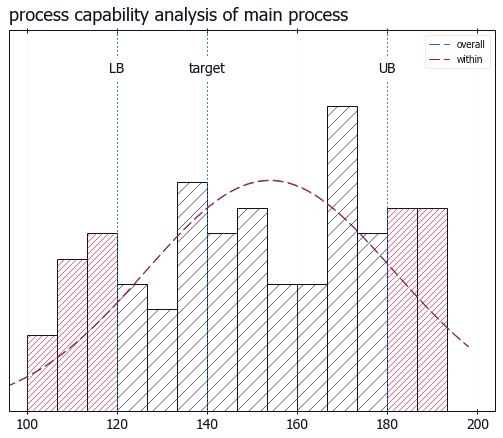

In [9]:
s.blue.ppa.process_capability(target=140, ub=180, lb=120).plot()

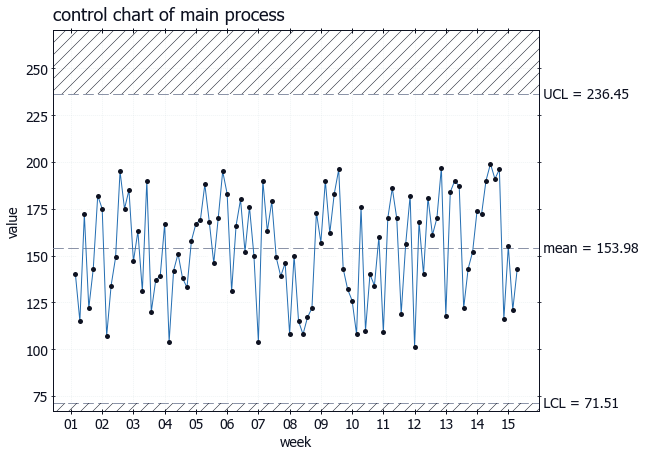

In [10]:
control.plot()

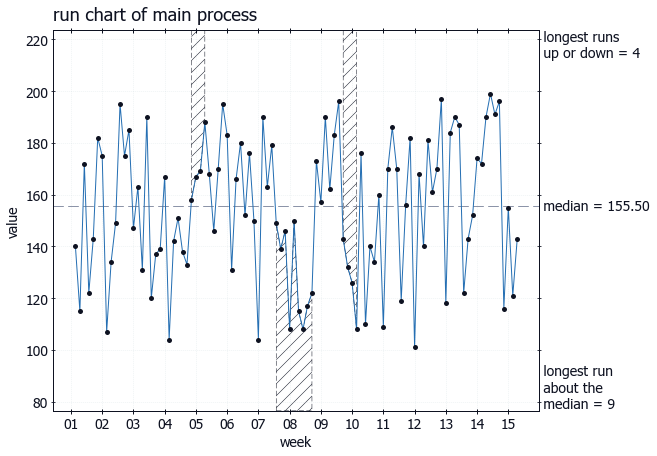

In [11]:
run.plot()

In [12]:
print(run)

runs about the median:          40
expected runs about the median: 51
longest run about the median:   9
clustering (p ≈ 0.01):          True
mixtures (p ≈ 0.99):            False

runs up or down:                66
expected runs up or down:       66
longest run up or down:         4
trends (p ≈ 0.47):              False
oscillation (p ≈ 0.53):         False


In [13]:
#dfx['pick'].blue.ppa.run_chart().plotly()#(figsize=(15,6))

Text(0.0, 1.0, '$\\bar{x} = 155.50$')

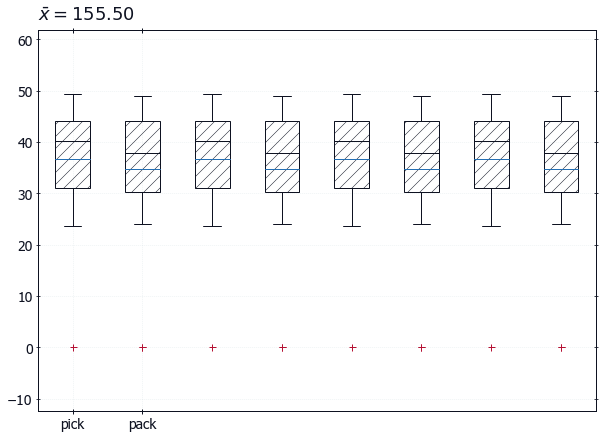

In [14]:
#from matplotlib.patches import Rectangle
boxplot = plt.boxplot([dfx['pick'], dfx['pack'], dfx['pick'], dfx['pack'], dfx['pick'], dfx['pack'], dfx['pick'], dfx['pack']])

for box in boxplot['boxes']:
    box.set(hatch='//')
plt.xticks([1, 2], [dfx['pick'].name, dfx['pack'].name])
plt.gcf().gca().set_title(r'$\bar{x} = 155.50$', loc='left')

Text(0.5, 1.0, '$\\bar{X} = 155.50$')

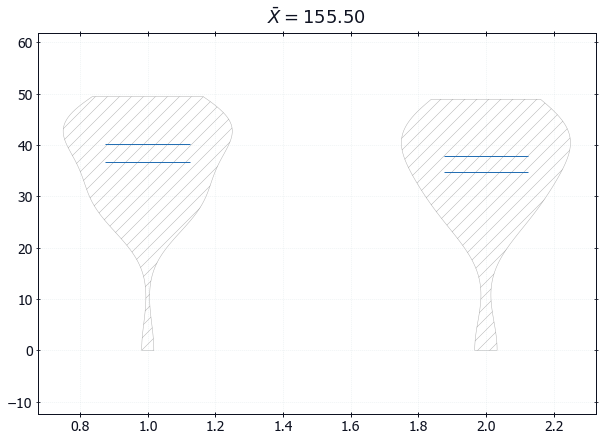

In [15]:
data = [dfx['pick'], dfx['pack']]
fig, ax = plt.subplots()

violinplot = ax.violinplot(data, showmeans=True, showmedians=True, showextrema=False)

for pc in violinplot['bodies']:
    pc.set_facecolor(None)
    pc.set_edgecolor('black')
    pc.set(hatch='//')

ax.set_title(r'$\bar{X} = 155.50$')


<AxesSubplot:xlabel='pick', ylabel='Density'>

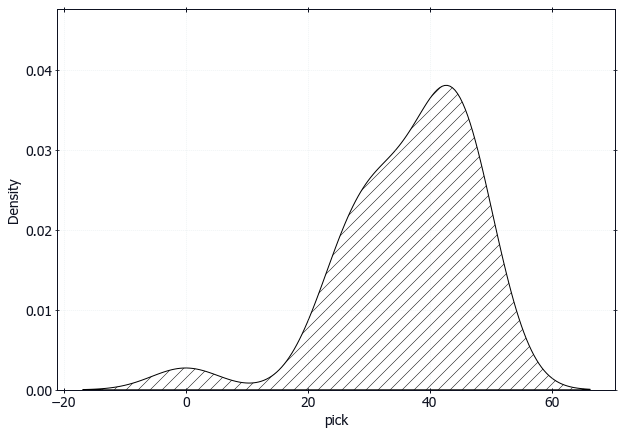

In [25]:
sns.kdeplot(dfx['pick'], fill=True, hatch='//', edgecolor='black', lw=1, facecolor='white')
#sns.kdeplot(dfx['pick'], color='black')


In [17]:
y = stats.gaussian_kde(dfx['pack'], bw_method=0.1)
xs = np.linspace(dfx['pack'].min(), dfx['pick'].max(), 1000)

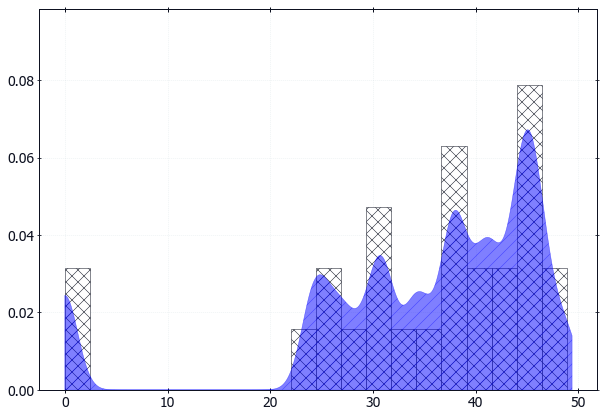

In [18]:
plt.hist(dfx['pack'], density=True, bins=20, color='white', hatch='xx', zorder=20)
plt.fill_between(xs, y(xs), 0, hatch='//', facecolor='blue', alpha=0.5, edgecolor='blue', zorder=50)


Text(0.0, 1.0, 'histogram')

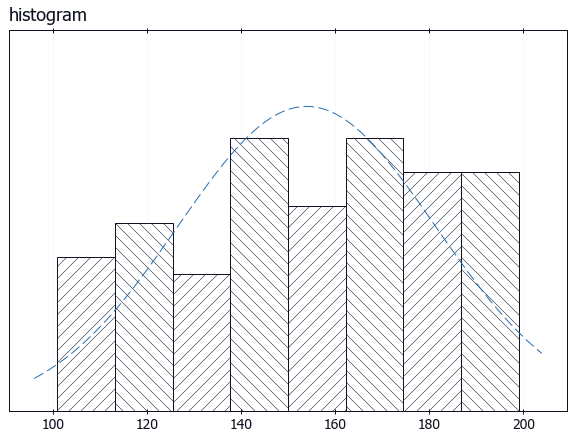

In [19]:
N, bins, patches = plt.hist(s, fill=False, linewidth=1, density=True)

hatches = ['//', '\\\\']
for i, patch in enumerate(patches):
    patch.set(hatch=hatches[i%len(hatches)])

    
import scipy.stats as stats

# Fit a normal distribution to the data:
mu, std = stats.norm.fit(s)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=1, ls='dashed', color=blue.helpers.defaults.blue)
plt.gcf().gca().set_yticks([])
plt.gcf().gca().set_title('histogram', loc='left')

In [20]:
s.blue.test.normal_distribution()

In [21]:
blue.analysis.distribution.anderson_darling(s)

AttributeError: module 'bluebelt.analysis' has no attribute 'distribution'

In [ ]:
AD, critical_values, significance_level = stats.anderson(s.dropna().values, dist='norm')
AD_adjusted = AD*(1 + (.75/50) + 2.25/(50**2))

In [ ]:
if AD_adjusted >= .6:
    pvalue = math.exp(1.2937 - 5.709*AD_adjusted - .0186*(AD_adjusted**2))
elif AD_adjusted >=.34:
    pvalue = math.exp(.9177 - 4.279*AD_adjusted - 1.38*(AD_adjusted**2))
elif AD_adjusted >.2:
    pvalue = 1 - math.exp(-8.318 + 42.796*AD_adjusted - 59.938*(AD_adjusted**2))
else:
    pvalue = 1 - math.exp(-13.436 + 101.14*AD_adjusted - 223.73*(AD_adjusted**2))

pvalue

In [ ]:
D, p = stats.kstest(s.values, 'norm', args=stats.norm.fit(s.values))

In [ ]:
p

In [ ]:
mu, std = stats.norm.fit(s)


In [ ]:
# H0 the two distributions are identical, F(x)=G(x)
dist = 'norm'
parameters = eval("stats."+dist+".fit(s.values)");

(osm, osr), (slope, intercept, r) = stats.probplot(s, dist=eval("stats."+dist), sparams=parameters, fit=True)

with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        #Applying the Kolmogorov-Smirnof one sided test
        D, p = stats.kstest(s.values, dist, args=parameters)

In [ ]:
p

In [ ]:
fig, ax = plt.subplots()

ax.scatter(osm, osr, color=blue.helpers.defaults.blue)
ax.plot(osm, osm*slope + intercept, color='black', lw=1, ls='dashed')
ax.text(0.99, 0.01, f'Kolmogorov-Smirnof\ntest statistic: {D:1.2f}\np-value: {p:1.2f}', transform=ax.transAxes, ha='right', va='bottom')
ax.set_title(f'probability plot of {s.name} for {dist} distribution', loc='left')

In [ ]:
s.blue.ppa.run_chart().plotly(width=640, height=450)#.write_image("fig1.png")#(figsize=(10,4))#.savefig('control.png')

In [ ]:
s.blue.ppa.run_chart()

In [ ]:
plt.scatter([0.3],[0.1])
plt.gcf().gca().set_xlim(0,1)
plt.gcf().gca().set_ylim(0,1)

In [ ]:
#dfx['pick'].iloc[3]=120
#dfx['pick'].iloc[10]=-50

dfx['pick'].blue.ppa.control_chart().plotly()

In [ ]:
plt.plot(dfx['pick'])
plt.tight_layout(rect=[0.3,0.3,0.7,0.7])

In [ ]:
s.blue.ppa.run_chart()

In [ ]:

s = dfx['pick']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))

ax.plot(s, marker='o', ms=5, lw=1)

ylim = ax.get_ylim()

ax.axhline(s.median(), ls=(0,(5,10)), color=blue.helpers.defaults.black, lw=1)
ax.fill_between(s.index[5:11], s.values[5:11], ylim[0], hatch='//', color=None, ls=(0, (5,15)))

ax.fill_between(s.index[9:15], s.values[9:15], ylim[1], hatch='\\\\', color=None, ec=(1,1,1), lw=0)
ax.set_xlabel('test')
ax.set_ylim(ylim[0], ylim[1])
#ax.set_xlim(s.index.min(), s.index.max())
#text_x = s.index[6]
#text_y = ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0])/10
#ax.text(text_x, text_y, 'run about the median', ha='center', va='center', bbox=dict(boxstyle="square, pad=0.3", fc="white", ec="black", lw=1))

In [ ]:
dfx['pack'].blue.patterns.polynomial().plot()
dfx['pack'].blue.patterns.polynomial().plot()

dfx['pack'].blue.patterns.polynomial().blue.patterns.periodical(period='3d', how='max', step=2).plot()

In [ ]:
dfx['pick'].index.day_name('nl_NL')

In [ ]:
dfx.blue.std.pooled_std(columns=['pick','pack'])

In [ ]:
dfd = pd.DataFrame({'year': [2020,2020,2020], 'week': [36,37,38]})

In [ ]:
dfd.blue.dt.date_from_weeknumber(year='year', week='week')

In [ ]:
blue.datetime.dt.is_holiday(df['date']).head()

In [ ]:
dfx['packpoly'] = dfx['pack'].blue.patterns.polynomial()

In [ ]:
dfx.blue.patterns.anomalies(values='pack', pattern='packpoly')

In [ ]:
dfx

In [ ]:
plt.plot(dfx['packpoly'][17:22], color='red', lw=12, alpha=0.5)
plt.plot(dfx['packpoly'][20:25], color='blue', lw=12, alpha=0.5)
plt.plot(dfx['packpoly'], color=(0,0,0))
plt.fill_between(dfx.index[7:12], dfx['packpoly'][7:12], dfx['packpoly'][7:12]+1, color=None, hatch='||||', lw=0)
plt.fill_between(dfx.index[10:15], dfx['packpoly'][10:15], dfx['packpoly'][10:15]-1, color=None, hatch='||||', lw=0)
plt.show()

In [ ]:
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 1  # previous svg hatch linewidth
mpl.rcParams['patch.facecolor'] = 'white'
#plt.plot([0,1],[0,1],ls="--",c="b")
plt.fill_between([0,1],[0,1], color=None, hatch='X', edgecolor="b", linewidth=0.0)
plt.show()

In [ ]:
dfx.blue.std.pooled_std(columns=['pick', 'packpoly'])

In [ ]:
dfx.blue.test.equal_means(columns=['pick', 'pack'])

In [ ]:
dfx['pick'].plot()
dfx['pack'].plot()

In [ ]:
tuple(ti/255 for ti in (128,45,124))

In [ ]:
((dfx['pick']-dfx['pick'].mean())**2).sum()

In [ ]:
def pooled_std(df, columns=None, **kwargs):
    """
    Calculate poolded standard deviation for pandas DataFrame columns.
    Pass kwargs for numpy.std (like ddof)
    pooled_std = (((n1-1)*std1**2 + (n2-1)*std2**2 +...+ (nk-1)*stdk**2) / (n1+n2+...+nk-k))**0.5
    """
    # have the entire dataframe or just some columns
    df = df if columns is None else df[columns]

    #return (sum((len(df[column].values)-1)*np.std(df[column].values, **kwargs)**2 for column in df) / (sum(len(df[column].values) for column in df) - len(df.columns)))**0.5
    result1 = (sum((len(df[column].values)-1)*np.std(df[column].values, **kwargs)**2 for column in df) / (sum(len(df[column].values) for column in df) - len(df.columns)))**0.5
    result2 = (sum(((df[column]-df[column].mean())**2).sum() for column in df) / (df.shape[0]-df.shape[1]))**0.5
    
    #result1 = result1 / c4(df.shape[0]-df.shape[1]+1)
    result2 = result2 / c4(df.shape[0]-df.shape[1]+1)
    return (result1, result2)

def c4(N):
    # unbiasing constant c4
    return ((2 / (N-1))**0.5) * ( (math.gamma(N/2)) / ( math.gamma((N-1)/2) ) )


In [ ]:
pooled_std(dfx[['pick', 'pack']])

In [ ]:
dfx[['pick', 'pack']].shape[0]-dfx[['pick', 'pack']].shape[1]

In [ ]:
def test(df):
    return sum(((df[column]-df[column].mean())**2).sum() for column in df)

In [ ]:
test(dfx[['pick', 'pack']])